<a href="https://colab.research.google.com/github/vivekp12/dst_example_project/blob/master/04_ReLUInvestigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigation of Rectified Linear Unit (ReLU) Activation Function

In this document, we investigate the rectified linear unit (ReLU) activation function in using neural networks to classify brain tumours.

**Table of Contents**
1. Requirements
2. Mathematical Background on Neural Networks
3. Mathematical Background on ReLU Activation
4. Investigation of ReLU Activation
5. Conclusion

# 1. Requirements

We load the required packages below.

# 2. Neural Network

A neural network (NN) is a machine learning model inspired by how the *human brain* works (see [16, 20] for a detailed history, including the work of McCullogh and Pitts, the development of the perceptron, and more). In this document, we come full circle, as we use it to classify brain tumours!

## Basics

We explain the basics of neural networks, using information from [17, 18]]. A neural network (NN) is composed of layers of interconnected nodes called **neurons**. These neurons are organized in three main layers:

- **Input layer**: This is where data enters the network. Each input feature (e.g., pixels of an image or values in a dataset) corresponds to one neuron in this layer.
- **Hidden layers**: These intermediate layers perform the actual processing. Each neuron in a hidden layer receives inputs from the previous layer, applies a mathematical operation (known as an **activation function**), and passes the result to the next layer.
- **Output layer**: This layer produces the network's final output or prediction, such as a classification label.

Collectively, this is called the **architecture** of the NN. This is shown in the Figure below.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*L1bH8PUeLf67Aat-h5phpw.png" alt="Figure taken from Medium Article - accessed 10/11/2024." title="Beautiful Sunset">
    <figcaption>Figure showing the architecture of a neural network. Figure taken from <a href="https://miro.medium.com/v2/resize:fit:1400/1*L1bH8PUeLf67Aat-h5phpw.png">Medium Article</a> - accessed 10/11/2024 08:37.</figcaption>
</figure>

# Mathematical formulation

To understand how this works mathematically, we give an example and provide an analogy to the human nervous system. Consider a neuron $i$ in a hidden or output layer. It receives inputs from previous-layer neurons $a_j$, with respective outputs $x_{a_j}$. Each input is **weighted** before passing through an activation function $f$. Mathematically, we write the output of neuron $i$ as:

$$
f(W_{0,i} + \sum_{j} W_{j,i} x_{a_j}).
$$

Here, $W_{0,i}$ is a bias term, and the $W_{j,i}$ values are weights. The bias term can be thought of as a neuron $a_0$ that always provides a signal $x_{a_0} = 1$, helping to adjust the activation function's behavior by situating the output signal in the appropriate range [18].

This mimics the biological neuron, which takes *signals* (the $x_{a_j}$ here) from other neurons (say we take in signals relating to taste, sight, touch, hearing and emotions) and based on the phenomenon (e.g. if you are eating, taste and touch are most important) there is a certain **importance** of each signal (the **weights**, which we will call $W_{i,j}$). The signal will be processed into some other signal (this is the part where we pass to the activation function) and then transmitted (this is where we output to the next layer).

## Training

The training process in neural networks involves adjusting the weights and biases through backpropagation combined with gradient descent. When the network makes a mistake, the error is propagated backward, and the weights are updated to minimize the error. Gradient descent optimizes by adjusting weights in the direction that reduces the error the most. This process aims to minimize the difference between predicted output and actual output using a loss function. Repeating these weight updates over many units of time, or "epochs," generally improves the network's accuracy in making predictions.

<figure>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp" alt="Figure taken from Analytics Vidhya - accessed 10/11/2024.">
    <figcaption>Figure showing the process of gradient descent. Figure taken from <a href="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp">Analytics Vidhya</a> - accessed 10/11/2024.</figcaption>
</figure>


Note that there is a lot of information about layers and neurons to be stored, as each neuron $a_i^{\ell}$ in each layer $\ell$ will have weights $W_{j,i}^{\ell}$ for the inputs from neurons $a_{j}^{\ell -1}$ from the previous layer. Hence, we need a lot of indices to store this information. To do this effectively, we use *tensors* [19].

Tensors are generalisations of matrices ($A = (a_{ij})$) and vectors ($a = (a_i)$) to higher dimensions [21]. For example, "rank 0" tensors are scalars, "rank 1" tensors are vectors, and "rank 2" tensors are matrices. When adding more dimensions, we call the corresponding quantity a rank $n$ tensor. Using tensors, we can write out the backpropagation process in a compact form (see for example [22]).

In short, neural networks learn patterns in data by adjusting the connections between their neurons. Tensors provide a compact way to organise the information about the weights and neurons, allowing us to express backpropagation mathematically in a compact way. (This explains both `Tensor` and `flow` in `Tensorflow` -- a particular platform that we will use to fit NNs.) We are going to make use of a special type of NN for our task of classifying brain tumours: the convolutional neural network.

## Convolutional Neural Network



A convolutional neural network (CNN) is a specialized type of neural network. CNNs are especially good at image-related tasks (like recognizing objects in pictures) because they can detect patterns and spatial hierarchies in data, such as edges, textures, and shapes [24]. They are even compared to the way the brain achieves vision processing in living organisms like cats [23]. They are the "de-facto standard" [19] in image processing, though in some cases newer architectures like transformers are being favoured. The picture below summarises how they work.

<figure>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/183560-qcmbdpukpdviccdd-66c7065d8f850.webp" alt="Figure from Analytics Vidhya - accessed 10/11/2024.">
    <figcaption>Figure from <a href="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/183560-qcmbdpukpdviccdd-66c7065d8f850.webp">Analytics Vidhya</a> - accessed 10/11/2024.</figcaption>
</figure>

We explain this in words. The way they work are:

1. Input: Instead of connecting every input to every neuron, CNNs use small filters, or kernels, that slide over the image to detect features. Each filter is essentially a small matrix (e.g. 3x3), which multiplies and sums pixel values in small regions of the input image. Linking back to the previous section, we can see an example of a tensor: the image input is a tensor with shape (number of inputs) × (input height) × (input width) × (input channels (3 if RGB)) [19].

2. Feature detection: Each filter is designed to recognize specific patterns, like edges or textures. As the filter slides across the image (a process called convolution), it creates a feature map, highlighting areas where the pattern is detected.

3. Multiple filters: CNNs use multiple filters in each convolutional layer. The first layer might detect basic patterns, like edges, while later layers combine these simpler patterns into more complex shapes or features.

4. Pooling: After a convolutional layer, a pooling layer reduces the spatial size of the feature maps, which decreases the number of parameters and computations. For example, in max pooling (the most common type), a small window slides over the feature map and takes the maximum value in each window. This effectively "summarizes" the strongest features in each area.

5. Stacking layers: In a CNN, multiple convolutional and pooling layers are stacked one after another. As data moves through each layer, the network learns increasingly abstract and complex features. Early layers detect simple patterns like edges, while deeper layers detect complex shapes and objects.
5. After the convolutional and pooling layers, the feature maps are “flattened” (converted into a 1D vector) and fed into a fully connected (FC -- FC layers are also called dense) layer. This layer combines features from all previous layers to make the final prediction.

Like other neural networks, CNNs are trained through backpropagation and gradient descent. During training, the weights in the filters are adjusted to reduce the error between the predicted output and the actual output.

CNNs have key advantages which make them especially good for image processing. We provide a brief summary below:
- Parameter efficiency: By sharing filter weights across the image, CNNs use fewer parameters compared to fully connected networks.
- Feature hierarchy: CNNs build a hierarchy of features, where lower layers capture basic details and deeper layers capture complex patterns.
Translation invariance: Pooling and convolution help make CNNs less sensitive to small changes in the input, like slight shifts or rotations.


# The Rectified Linear Unit

## Definition
The rectified linear unit is the function defined by $$f(x) = \max\{0, x\}.$$ A plot of this function is produced below.

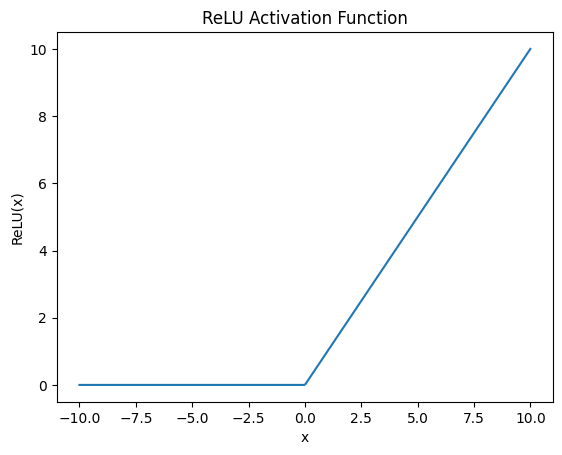

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values and corresponding ReLU values
x = np.linspace(-10, 10, 400)
y = relu(x)

# Plot
plt.plot(x, y, label="ReLU")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.title("ReLU Activation Function")
plt.grid(False)
plt.show()


## History
As motivation for why we would be interested in the ReLU, we investigate its history.

The ReLU was first used by Alston Householder in 1941 as a mathematical abstraction of biological neural networks (those in the human nervous system rather than the deep learning method) [11]. It was introduced by Kunihiko Fukushima in 1969 to extract visual features using a neural network [12]. It is highly interesting and gives an insight into how the biological nervous system has led to the idea of a neural network.

As of 2017, ReLU is the most popular activation function for deep neural networks [7]. ReLUs are used widely, with applications in computer vision (the field concerned with the analysis and processing of images) [8], speech recognition [9], biology and neuroscience [10].

### Features of ReLU

In the literature, ReLU is noted to have several useful features. We summarise them below, using sources [7, 13, 14]:
- Non-linearity: Non-linearity is essential to work as an activation function. This is because a neural network essentially works by composition of functions, and linear functions are closed under composition. To see this, note that if $g(x) = ax + b$ then $$g(g(x)) = g(ax+b) = a(ax+b) + b = a^2 x + (ab  + b),$$ which is another linear function -- so overall we can simplify the network to just a linear function. Non-linearities are therefore essential.
- Sparse activation: In a randomly initialized network, only about 50% of hidden units are activated (have a non-zero output). Sparsity in matrices (which arise as we try to find compact notation for the neurons in a neural network) is extremely useful, as algorithms that can leverage sparsity are much faster [15].
- Better gradient propagation: Fewer vanishing gradient problems compared to sigmoidal activation functions that saturate in both directions [7]. To see this, note that the ReLU function is idempotent, meaning that $f(f(x)) = f(x)$. This is clearly seen by a calculation, since $f(f(x)) = f(0) = 0$ if $x < 0$ and $f(f(x)) = f(x) = x$ if $x \geq 0$. This property is very important for deep neural networks as many layers mean that many compositions of $f$ will happen. To contrast this, functions such as the sigmoid and hyperbolic tangent "squash" their inputs. This leads to flat regions for more values of $x$, resulting in the vanishing gradient problem: derivatives approach zero as $n$
 (the number of repeated compositions) approaches infinity [13]. We illustrate this below.

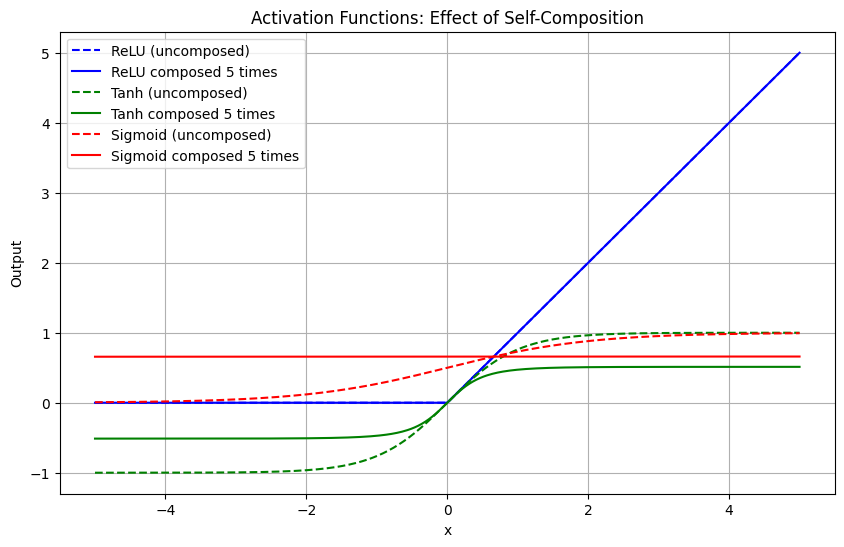

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def sigmoid(x): return 1 / (1 + np.exp(-x))

# Apply the activation function n times
def apply_composed(func, x, n=5):
    for _ in range(n):
        x = func(x)
    return x

# Generate x values
x = np.linspace(-5, 5, 400)

# Define activation functions and their colors
functions = [relu, tanh, sigmoid]
function_names = ["ReLU", "Tanh", "Sigmoid"]
colors = ["blue", "green", "red"]

# Plotting
plt.figure(figsize=(10, 6))
for func, name, color in zip(functions, function_names, colors):
    y = func(x)
    y_composed = apply_composed(func, x, n=5)
    plt.plot(x, y, label=f"{name} (uncomposed)", color=color, linestyle="--")
    plt.plot(x, y_composed, label=f"{name} composed 5 times", color=color)

# Adding labels and title
plt.title("Activation Functions: Effect of Self-Composition")
plt.xlabel("x")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


The picture shows the sigmoid function becoming almost flat over the whole range plotted, and the hyperbolic tangent becoming flatter. However, the idempotence of the ReLU means that there is no "flattening".

Another useful feature of the ReLU is that it is efficient to compute. It only requires a comparison and addition, without needing exponentiation or division. It is also scale-invariant, in the sense that $f(ax) = af(x)$ for any constant $a \geq 0$.

These advantages partly explain ReLU's popularity in applications. However, it is not without its faults, as we see next.

## Disadvantages of ReLU

Below, we explain some disadvantages of the ReLU. We list this below:
- Non-differentiable at zero: The value of the derivative at zero can be arbitrarily chosen to be 0 or 1.

- Not zero-centered: ReLU outputs are always non-negative. This can make it harder for the network to learn during backpropagation because gradient updates tend to push weights in one direction (positive or negative). Wikipedia [14] Batch normalization can help address this.
Unbounded.
Dying ReLU: ReLU neurons can sometimes be pushed into states in which they become inactive for essentially all inputs. In this state, no gradients flow backward through the neuron, and so the neuron becomes stuck in a perpetually inactive state and "dies". This is a form of the vanishing gradient problem. In some cases, large numbers of neurons in a network can become stuck in dead states, effectively decreasing the model capacity. This problem typically arises when the learning rate is set too high. It may be mitigated by using leaky ReLUs instead, which assign a small positive slope for x < 0; however, the performance is reduced.



## Data Augmentation

We load the data below, and perform data augmentation. We explain what data augmentation is below, synthesising material from [1, 3, 4, 5, 6].

Data augmentation refers to generating artificial data to allow the neural network (or any machine learning model in general) to generalise better during the testing (or deployment) phase [1]. The data has to have good diversity as the object of interest needs to be present in varying sizes, lighting conditions and poses to be able to achieve generalisability. To overcome the problem of limited quantity and diversity of data, we perform data augmentation. When convolutional neural networks grew larger in mid-1990s, there was a lack of data to use, especially considering that some part of the overall dataset should be spared for later testing. It was proposed to perturb existing data with affine transformations to create new examples with the same labels,[6] which were complemented by so-called elastic distortions in 2003,[7] and the technique was widely used as of 2010s.[8] Data augmentation can enhance CNN performance and acts as a countermeasure against CNN profiling attacks.[9]


 To achieve this, we will use `ImageDataGenerator` [3] from `keras` to rescale the pixel values, do geometric transformations (rotations, flips, shears, zooms) of images and more.

In more detail, the processes we may apply in data augmentation are:

- Geometric transformations: randomly flip, crop, rotate, stretch, shear and zoom images. We should avoid applying multiple transformations on the same images, as this can reduce model performance [[5]](https://www.datacamp.com/tutorial/complete-guide-data-augmentation).
- Color space transformations: randomly change RGB color channels, contrast, and brightness.
- Kernel filters: randomly change the sharpness or blurring of the image.
- Random erasing: delete some part of the initial image.
- Mixing images: blending and mixing multiple images.

Wikipedia

Data augmentation for image classification



Data augmentation has become fundamental in image classification, enriching training dataset diversity to improve model generalization and performance. The evolution of this practice has introduced a broad spectrum of techniques, including geometric transformations, color space adjustments, and noise injection.[10]

Geometric Transformations

Geometric transformations alter the spatial properties of images to simulate different perspectives, orientations, and scales. Common techniques include:

- Rotation: Rotating images by a specified degree to help models recognize objects at various angles.
- Flipping: Reflecting images horizontally or vertically to introduce variability in orientation.
- Cropping: Removing sections of the image to focus on particular features or simulate closer views.
- Translation: Shifting images in different directions to teach models positional invariance.

Color Space Transformations

Color space transformations modify the color properties of images, addressing variations in lighting, color saturation, and contrast. Techniques include:

- Brightness Adjustment: Varying the image's brightness to simulate different lighting conditions.
- Contrast Adjustment: Changing the contrast to help models recognize objects under various clarity levels.
- Saturation Adjustment: Altering saturation to prepare models for images with diverse color intensities.
- Color Jittering: Randomly adjusting brightness, contrast, saturation, and hue to introduce color variability.
- Noise Injection: Injecting noise into images simulates real-world imperfections, teaching models to ignore irrelevant variations. Techniques involve:
- Gaussian Noise: Adding Gaussian noise mimics sensor noise or graininess.
- Salt and Pepper Noise: Introducing black or white pixels at random simulates sensor dust or dead pixels.


ChatGPT explanation of what `keras` is doing:

1. Rotation (rotation_range=40)

Purpose: Rotates images randomly within a range of ±40 degrees.
Benefit: Helps the model learn to recognize features regardless of their orientation. This is particularly useful in cases where the subject of the image might be positioned at different angles (e.g., brain scans that are slightly tilted).

2. Width Shift (width_shift_range=0.2)

Purpose: Randomly shifts images horizontally by up to 20% of the width of the image.
Benefit: Helps the model be less sensitive to the position of features along the horizontal axis. For example, if a brain tumor is off-center, this augmentation allows the model to still recognize it.

3. Height Shift (height_shift_range=0.2)

Purpose: Similar to width shifting, but vertically; shifts the image by up to 20% of the height.
Benefit: Makes the model more robust to vertical misalignments. This is beneficial when features aren’t perfectly centered.

4. Shear (shear_range=0.2)

Purpose: Applies a shearing transformation, which skews the image in a way that one side “slants” towards the other.
Benefit: Helps the model recognize objects that might be deformed or angled in an unusual way. This can simulate slight distortions that might occur in real-world imaging data.

5. Zoom (zoom_range=0.2)

Purpose: Randomly zooms into the image by up to 20%.
Benefit: Allows the model to learn from both close-up and wide-view perspectives of the features. This helps especially in medical images, where a feature could appear in different sizes.

6. Horizontal Flip (horizontal_flip=True)

Purpose: Flips the image horizontally with a 50% chance.
Benefit: This makes the model invariant to the left-right orientation of features. In cases where tumors or other key structures are equally likely to be on either side, this augmentation is helpful.

7. Fill Mode (fill_mode='nearest')

Purpose: Decides how to fill in pixels created by transformations like shifts and rotations.
Benefit: Using nearest ensures that new pixels introduced by transformations take the value of the nearest pixel, which can help preserve context and continuity at image edges.

In [2]:
from pathlib import Path  # Import pathlib to work with paths
import kagglehub
import os  # Import os module for file operations
import hashlib
import numpy as np
from tqdm import tqdm
import cv2
import os
import imutils

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

# Convert path to a Path object
path = Path(path)

# Define your project directory and labels based on your dataset structure
PROJECT_DIR = path
LABELS = ['pituitary', 'notumor', 'meningioma', 'glioma']  # Adjust these labels based on your dataset's folder names

def crop_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    return new_img


# Convert 'path' to Path object (already done above)
train_dir = path / "Training"
test_dir = path / "Testing"

if __name__ == "__main__":
    training = train_dir
    testing = test_dir

    training_dir = os.listdir(training)
    testing_dir = os.listdir(testing)

    IMG_SIZE = 256

    for dir in training_dir:
        save_path = Path('cleaned/Training') / dir  # Using pathlib's '/' operator
        path = training / dir  # Using pathlib's '/' operator
        image_dir = os.listdir(path)

        for img in image_dir:
            image = cv2.imread(str(path / img))  # Convert Path to string for OpenCV
            new_img = crop_img(image)
            new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))

            if not save_path.exists():
                save_path.mkdir(parents=True)

            cv2.imwrite(str(save_path / img), new_img)  # Convert Path to string for OpenCV

    for dir in testing_dir:
        save_path = Path('cleaned/Testing') / dir
        path = testing / dir
        image_dir = os.listdir(path)

        for img in image_dir:
            image = cv2.imread(str(path / img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))

            if not save_path.exists():
                save_path.mkdir(parents=True)

            cv2.imwrite(str(save_path / img), new_img)


100%|██████████| 149M/149M [00:07<00:00, 20.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


# [Start of Investigations]

[Let's keep the code for ImageDataGenerator consistent]

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from pathlib import Path
import matplotlib.pyplot as plt

# Define directories for training and testing images
train_dir = Path('cleaned/Training')
test_dir = Path('cleaned/Testing')

# Number of classes
LABELS = ['pituitary', 'notumor', 'meningioma', 'glioma']

# Image size and batch size
IMG_SIZE = 64  # Resize images to 64x64
BATCH_SIZE = 32

# Setup ImageDataGenerators for loading and preprocessing the images
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in and out
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest',  # Fill any missing pixels using the nearest pixel
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness between 0.5 and 1.5 times the original
    channel_shift_range=20.0  # Randomly shift RGB channels (intensity)
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

# Load images from directories using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Use 'binary' for binary classification, 'categorical' otherwise
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for test data
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


Selected random image: cleaned/Training/pituitary/Tr-pi_0067.jpg


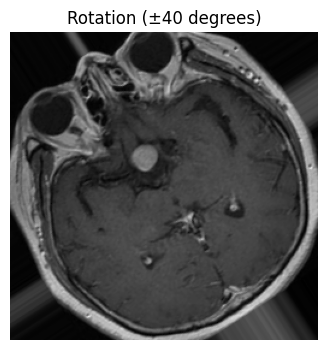

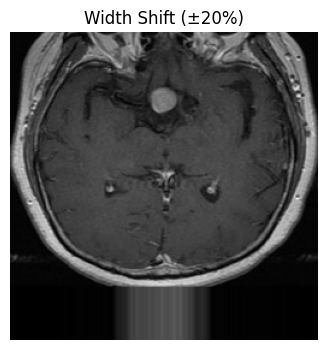

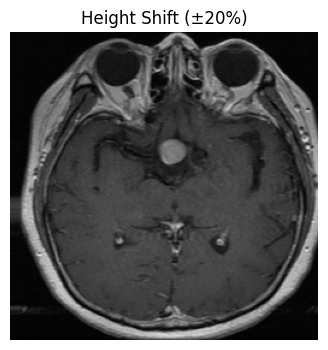

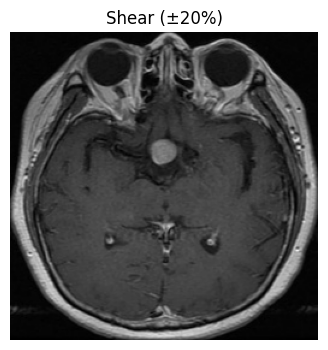

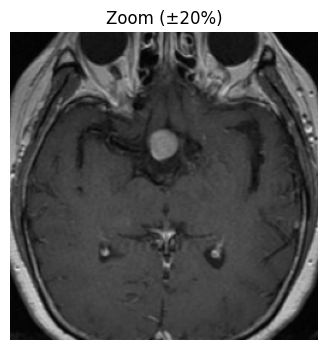

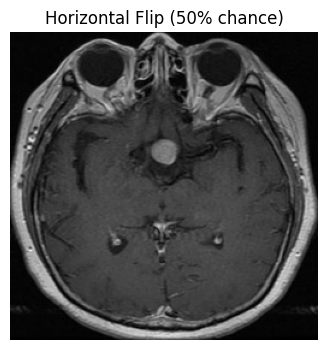

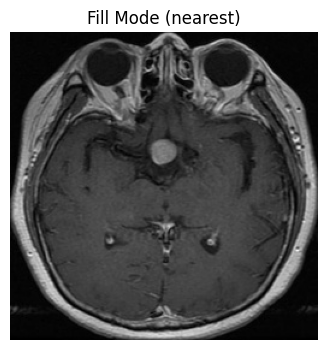

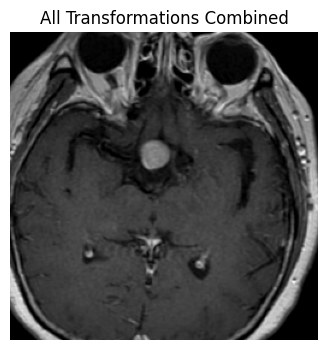

In [15]:
import random
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define the train directory
train_dir = Path('cleaned/Training')

# Get all label subdirectories (e.g., pituitary, notumor, etc.)
label_dirs = [d for d in train_dir.iterdir() if d.is_dir()]

# Choose a random label directory and a random image within it
random_label_dir = random.choice(label_dirs)
image_files = list(random_label_dir.glob('*.jpg'))  # Assuming images are in .jpg format
random_image_path = random.choice(image_files)

# Load the chosen random image
img = load_img(random_image_path)  # Load the image
img_array = img_to_array(img)      # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension for generator

# Print selected image path
print(f"Selected random image: {random_image_path}")

# Function to display a single augmented image
def display_single_augmented_image(datagen, img_array, title):
    augmented_images = datagen.flow(img_array, batch_size=1)
    aug_img = next(augmented_images)[0].astype('uint8')  # Generate one augmented image
    plt.figure(figsize=(4, 4))
    plt.imshow(aug_img)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Display augmentations individually
# 1. Rotation
datagen = ImageDataGenerator(rotation_range=40)
display_single_augmented_image(datagen, img_array, "Rotation (±40 degrees)")

# 2. Width Shift
datagen = ImageDataGenerator(width_shift_range=0.2)
display_single_augmented_image(datagen, img_array, "Width Shift (±20%)")

# 3. Height Shift
datagen = ImageDataGenerator(height_shift_range=0.2)
display_single_augmented_image(datagen, img_array, "Height Shift (±20%)")

# 4. Shear
datagen = ImageDataGenerator(shear_range=0.2)
display_single_augmented_image(datagen, img_array, "Shear (±20%)")

# 5. Zoom
datagen = ImageDataGenerator(zoom_range=0.2)
display_single_augmented_image(datagen, img_array, "Zoom (±20%)")

# 6. Horizontal Flip
datagen = ImageDataGenerator(horizontal_flip=True)
display_single_augmented_image(datagen, img_array, "Horizontal Flip (50% chance)")

# 7. Fill Mode
datagen = ImageDataGenerator(fill_mode='nearest')
display_single_augmented_image(datagen, img_array, "Fill Mode (nearest)")

# 8. All Transformations Combined
train_datagen = ImageDataGenerator(
    rotation_range=20,         # Random rotation
    width_shift_range=0.1,     # Horizontal shift
    height_shift_range=0.1,    # Vertical shift
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Zoom in and out
    horizontal_flip=True,      # Flip horizontally
    fill_mode='nearest',       # Fill any missing pixels using the nearest pixel
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness
    channel_shift_range=20.0   # Randomly shift RGB channels
)
display_single_augmented_image(train_datagen, img_array, "All Transformations Combined")


In [2]:
random_image_path

NameError: name 'random_image_path' is not defined

# Investigations

# Depth

# etc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.3925 - loss: 1.2437 - val_accuracy: 0.5867 - val_loss: 1.0426
Epoch 2/5
  1/178 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5000 - loss: 1.1514

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 1.1514 - val_accuracy: 0.6129 - val_loss: 1.0132
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 19s 105ms/step - accuracy: 0.6125 - loss: 0.9596 - val_accuracy: 0.6320 - val_loss: 0.9745
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.4688 - loss: 1.0598 - val_accuracy: 0.9355 - val_loss: 0.4785
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.6511 - loss: 0.8368 - val_accuracy: 0.7398 - val_loss: 0.7424
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6699 - loss: 0.9056
Test accuracy: 0.7414


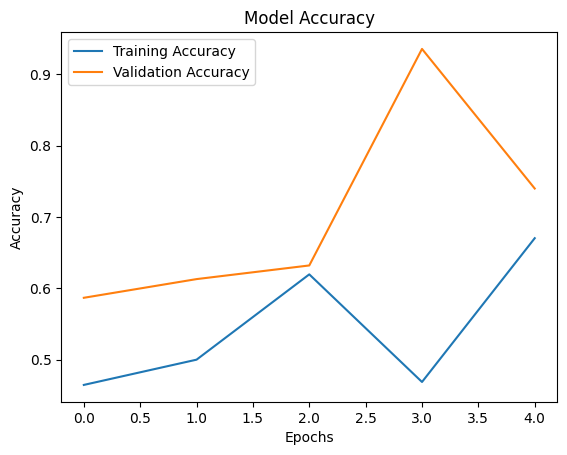

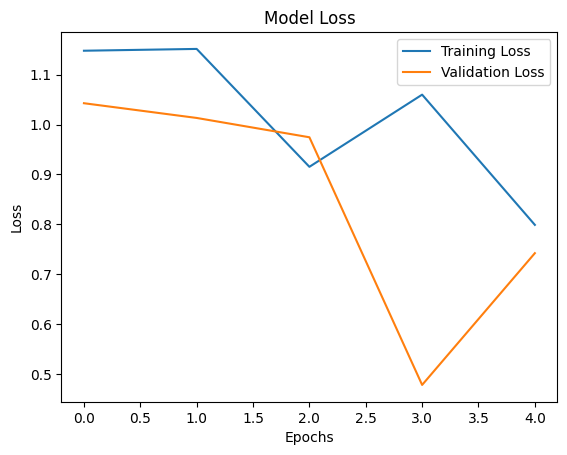

In [5]:
# Build CNN model
model = models.Sequential()

# Add convolutional layers with activation functions
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten before the dense output layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(LABELS), activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=5,  # Increased epochs to get better training results
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# References

[1] Data Augmentation: [Medium Article](https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9)

[2] Image processing for medical diagnosis using CNN - P Arena, A Basile, M Bucolo, L Fortuna - Nuclear Instruments and Methods, 2003 - Elsevier.

[3] Documentation of `ImageDataGenerator` from `keras`: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

[4] Data Augmentation IBM Article: https://www.ibm.com/topics/data-augmentation

[5] Data Augmentation DataCamp Article: https://www.datacamp.com/tutorial/complete-guide-data-augmentation

[6] Data Augmentation Wikipedia Article: https://en.wikipedia.org/wiki/Data_augmentation

[7] Ramachandran, Prajit; Barret, Zoph; Quoc, V. Le (October 16, 2017). "Searching for Activation Functions". arXiv:1710.05941 [cs.NE].

[8] Xavier Glorot; Antoine Bordes; Yoshua Bengio (2011). Deep sparse rectifier neural networks (PDF). AISTATS. Rectifier and softplus activation functions. The second one is a smooth version of the first.

[9] László Tóth (2013). Phone Recognition with Deep Sparse Rectifier Neural Networks (PDF).

[10] Bhoi, Akash Kumar, et al., eds. Bio-inspired neurocomputing. Vol. 310. Berlin/Heidelberg, Germany: Springer, 2021.

[11] Householder, Alston S. (June 1941). "A theory of steady-state activity in nerve-fiber networks: I. Definitions and preliminary lemmas". The Bulletin of Mathematical Biophysics. 3 (2): 63–69. doi:10.1007/BF02478220. ISSN 0007-4985.

[12] Fukushima, K. (1969). "Visual feature extraction by a multilayered network of analog threshold elements". IEEE Transactions on Systems Science and Cybernetics. 5 (4): 322–333. doi:10.1109/TSSC.1969.300225.

[13] Why use the ReLU? https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it

[14] Wikipedia article on ReLU: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#cite_note-3

[15] Bai, Yuhan. "RELU-function and derived function review." SHS Web of Conferences. Vol. 144. EDP Sciences, 2022.

[16] History of Neural Networks: https://en.wikipedia.org/wiki/Neural_network

[17] Neural network lecture notes: https://dsbristol.github.io/dst/assets/slides/07.1-PerceptronsNeuralNets.pdf

[18] Bias neuron: https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks

[19] Convolutional neural network: https://en.wikipedia.org/wiki/Convolutional_neural_network

[20] https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

[21] https://stats.stackexchange.com/questions/233253/tensors-in-neural-network-literature-whats-the-simplest-definition-out-there

[22] Tensor notation to express backpropagation: https://dlvu.github.io/slides/dlvu.lecture02.pdf

[23] van Dyck, Leonard Elia; Kwitt, Roland; Denzler, Sebastian Jochen; Gruber, Walter Roland (2021). "Comparing Object Recognition in Humans and Deep Convolutional Neural Networks—An Eye Tracking Study". Frontiers in Neuroscience. 15: 750639. doi:10.3389/fnins.2021.750639. ISSN 1662-453X. PMC 8526843. PMID 34690686.

[24] https://svitla.com/blog/cnn-for-image-processing/